In [34]:
import collections
import numpy as np
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import math
import time
import scipy
import pyclustering.cluster.kmedians as km
from scipy.spatial.distance import cdist, pdist

In [35]:
def file_to_array(file_name):
    with open(file_name) as f: 
        data = f.readlines()
    arr = [] 
    for d in data:  
        li =[]
        li_sub = d.split()
        li.append(float(li_sub[1]))
        li.append(float(li_sub[2])) 
        arr.append(li)        
    X = np.array(arr,dtype=np.float64) 
    return X,arr

def agl_means_cost(arr,labels):
    print('test')

In [40]:
def hierarchical_clustering(file_name):
    X,arr = file_to_array(file_name)
    # print(X)
    np.set_printoptions(threshold=np.nan)
    Z = linkage(X,'single')
    plt.figure(figsize=(10, 5))
    plt.title('Single Link Dendrogram of Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels   
    )
    plt.show()
    # print(Z)
    # print(X)
    Hclustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
    Hclustering.fit(X)
    print("SingleLink")
    print(Hclustering.labels_)
    plt.scatter(X[:,0], X[:,1], c=Hclustering.labels_) 
    plt.title('Single-Link representation of clusters')
    plt.show()
    Z = linkage(X,'complete')
    plt.figure(figsize=(10, 5))
    plt.title('Complete Link Dendrogram of Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels 
       
    )
    plt.show()
#     agl_means_cost(arr,Hclustering.labels_)
    Hclustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='complete')
    Hclustering.fit(X)
    print("CompleteLink")
    print(Hclustering.labels_)
    plt.scatter(X[:,0], X[:,1], c=Hclustering.labels_) 
    plt.title('Complete-Link representation of clusters')
    plt.show()    
#     agl_means_cost(arr,Hclustering.labels_)
    Hclustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='average')
    Hclustering.fit(X)
    print("MeanLink")
    print(Hclustering.labels_)
    plt.scatter(X[:,0], X[:,1], c=Hclustering.labels_) 
    plt.title('Mean-Link representation of clusters')
    plt.show()    
    Z = linkage(X,'average')
    plt.figure(figsize=(10, 5))
    plt.title('Means Link Dendrogram of Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels 
    )
    plt.show()

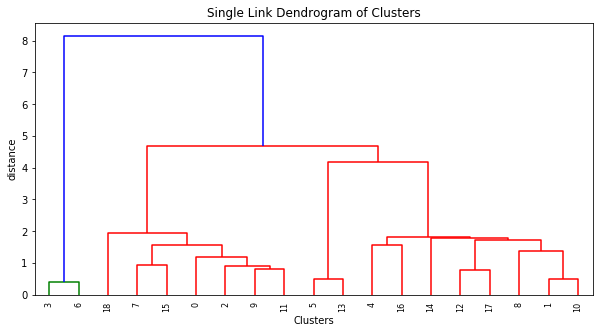

SingleLink
[1 2 1 3 2 0 3 1 2 1 2 1 0 0 0 1 2 0 1]


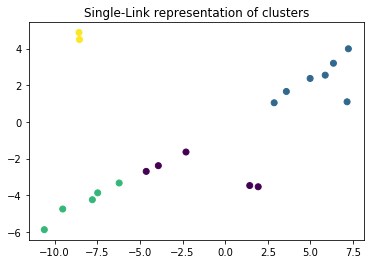

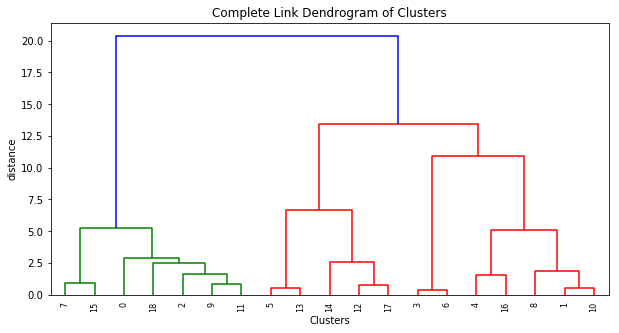

CompleteLink
[1 2 1 3 2 0 3 1 2 1 2 1 0 0 0 1 2 0 1]


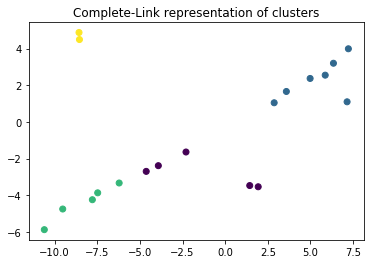

MeanLink
[1 0 1 2 0 3 2 1 0 1 0 1 0 3 0 1 0 0 1]


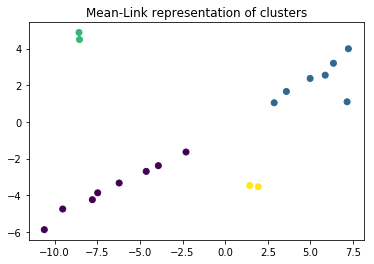

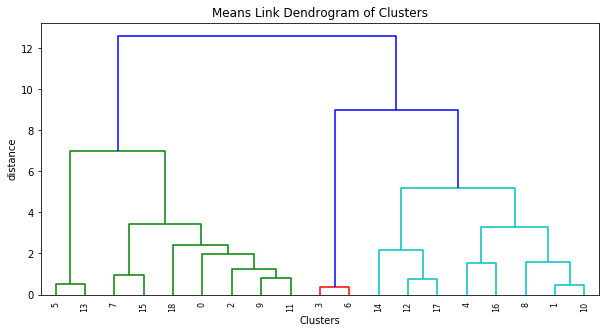

In [41]:
## Question 1
hierarchical_clustering('C1.txt')

In [21]:
def distance(a,b):
    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]
    return math.sqrt(math.pow(x2-x1,2)+math.pow(y2-y1,2))

In [24]:
def gonzalez(file_name, cluster_number):
    X,arr = file_to_array(file_name)
    cluster_labels=[0]*1040
    cluster_centers = [arr[0]]*cluster_number     
    
    for i in range(1,cluster_number):
        M=0
        c = cluster_centers[i]
        index=0
        for j in range(len(arr)):
            if distance(arr[j],cluster_centers[cluster_labels[j]]) > M:
                M = distance(arr[j],cluster_centers[cluster_labels[j]]) 
                c = arr[j]
                cluster_centers[i]=c
        j=0
        print(arr)        
        for j in range(len(arr)):
            if distance(arr[j],cluster_centers[cluster_labels[j]]) > distance(arr[j],c):
                cluster_labels[j]=i          
        # plt.scatter(X[:,0], X[:,1], c=cluster_labels)
        # plt.show()
    plt.scatter(X[:,0], X[:,1], c=cluster_labels)    
    print(cluster_centers)
    plt.title('Gonzalez Algorithm')
    plt.show()
    M=0
    sum_dist = 0
    for j in range(len(arr)):        
            dist = distance(arr[j],cluster_centers[cluster_labels[j]])        
            if  dist > M:
                M = dist 
            dist = dist*dist
            sum_dist = sum_dist + dist   
    sum_dist = sum_dist/1040
    print('The 3-center cost max is', M)  
    print('The 3-means cost max is', math.sqrt(sum_dist))  
    return cluster_centers              

In [26]:
def kmeans_plus(file_name, cluster_number):
    X,arr = file_to_array(file_name)
    y_vals =[]
    x_vals =[]
    list_centers=[]
    for i in range(20):
        x_vals.append(i+1)
        C = initialize(X, cluster_number)           
        cluster_labels=[0]*1040
        new_cluster_centers = C          
        for k in range(len(arr)):
            M=2**31-1
            for j in range(len(new_cluster_centers)):
              if distance(arr[k],new_cluster_centers[j]) < M:
                M = distance(arr[k],new_cluster_centers[j]) 
                cluster_labels[k]=j
        print(cluster_labels)       
        y_vals.append(means_cost(arr,new_cluster_centers,cluster_labels))
        list_centers.append(new_cluster_centers)
        # plt.scatter(X[:,0], X[:,1], c=cluster_labels)
        # plt.title('K Means++ Algorithm')
        # plt.show()
    sorted_data = np.sort(y_vals)    
    temp = float(len(sorted_data)-1)
    yvals=np.arange(len(sorted_data))/temp    
    plt.plot(sorted_data,yvals)
    plt.title('Cumulative Density Function for 3-means cost')
    plt.xlabel('3-means cost')
    plt.show()
    count =0
    center_1 =gonzalez(file_name, cluster_number)
    for center in list_centers:
        print(center)
        print(center_1)
        result = [x for x in center if not x in center_1]        
        if(len(result)==0):
            count = count+1
    print('The fraction of time the centers are equal is', count/21) 

In [27]:
def kmeans(file_name, cluster_number):     
    dist = cdist([[1,2,3,4,5]],[[2,3,4,5,6]])
    #print(sum(dist **2))   
    X= np.array([[0,0],[1,1],[2,2],[3,3],[4,4],[5,5]],dtype = np.int64)
    kMeansVar = [KMeans(n_clusters=k).fit(X) for k in range(2, 4)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(X, cent) for cent in centroids]
    #print(k_euclid)
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    #print(dist)
    wcss = [sum(d**2) for d in dist]
    #print(wcss)
    tss = sum(pdist(X)**2)/X.shape[0]
    #print(tss)
    bss = tss - wcss
    plt.plot(bss)
    plt.show()    
    X,arr = file_to_array(file_name) 
    #print(np.array([X[0],X[1],X[2]],np.float64))
    kmeans = KMeans(n_clusters=cluster_number,n_init=1, init=np.array([X[0],X[1],X[2]],np.float64)).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_) 
    plt.title('K-Means with Cluster centers as indexes 1,2,3')
    plt.show()  
    #print(labels)
    print('1,2,3',centers)
    means_cost(arr,centers,labels)
    print(np.array(gonzalez(file_name, cluster_number),np.float64))
    kmeans = KMeans(n_clusters=cluster_number,n_init=1, init=np.array(gonzalez(file_name, cluster_number),np.float64)).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_  
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_) 
    plt.title('K-Means with Cluster centers as gonzalez output')
    plt.show()  
    #print(labels)
    print('gonzalez',centers)
    means_cost(arr,centers,labels)
    list_means_cost = []
    for i in range(0,17):
        kmeans = KMeans(n_clusters=cluster_number,init=np.array(initialize(X, cluster_number))).fit(X)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_ 
        print('The K means Cluster Centers are',centers)                
        list_means_cost.append(means_cost(arr,centers,labels))     
    list_means_cost.append(6.32249345980089 )  
    list_means_cost.append(6.32249345980089 )    
    print(list_means_cost) 
    sorted_data = np.sort(list_means_cost)
    temp = float(len(sorted_data)-1)
    yvals=np.arange(len(sorted_data))/temp
    plt.plot(sorted_data,yvals)
    plt.show()    

In [30]:
def means_cost(arr,centers,labels):      
    M=0
    sum_dist = 0   
    for j in range(len(arr)):        
            dist = distance(arr[j],centers[labels[j]])        
            if  dist > M:
                M = dist 
            dist = dist*dist
            sum_dist = sum_dist + dist   
    sum_dist = sum_dist/1004         
    print('The 3-center cost max is', M)  
    print('The 3-means cost max is', math.sqrt(sum_dist))
    return math.sqrt(sum_dist)
                     
def initialize(X, K):
    C = [X[0].tolist()]
    for k in range(1, K):                 
        D2 = scipy.array([min([scipy.inner(c-x,c-x) for c in C]) for x in X])
        #print(D2)
        probs = D2/D2.sum()
        #print(D2.sum())
        cumprobs = probs.cumsum()
        r = scipy.rand()
        for j,p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        C.append(X[i].tolist())
    print('The initialized array is', C)    
    return C

[[-4.4357274, -5.6060004], [-5.7378081, -6.7261898], [-3.3755073, -6.8078161], [-3.60057, -5.4167769], [-3.7241204, -6.2411353], [-3.8819453, -5.0806108], [-3.5502471, -5.5710709], [-4.5474177, -6.3142414], [-4.426037, -6.4743314], [-3.1538396, -6.1455886], [-4.0004525, -6.384472], [-3.9551325, -4.6466725], [-2.8994207, -5.6713194], [-3.565161, -5.5801545], [-4.6357201, -5.2236324], [-3.7348412, -6.3800545], [-4.3147841, -6.4501303], [-4.3710008, -5.6945597], [-3.4456156, -5.8066268], [-3.7434374, -6.0869206], [-4.5283285, -5.2061822], [-2.9375214, -5.0603335], [-4.0255456, -6.0809353], [-4.7759457, -6.3366186], [-5.5040044, -5.9804901], [-3.8148002, -6.2660256], [-1.756621, -4.6388883], [-3.4361237, -5.6694007], [-3.8688091, -6.302476], [-4.2325216, -6.3220153], [-3.8461773, -5.12872], [-3.8893691, -6.4123887], [-3.692487, -6.4337346], [-3.8689858, -6.1779057], [-3.4831922, -5.7954474], [-5.1954559, -7.2683139], [-2.3395741, -5.8363895], [-4.2909707, -7.3065739], [-2.7551086, -5.38231

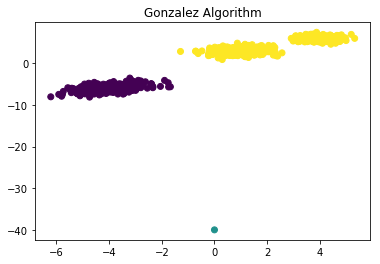

The 3-center cost max is 7.7721092399481115
The 3-means cost max is 3.713989008072261
The initialized array is [[-4.4357274, -5.6060004], [4.8034906, 5.9049177], [-3.1061304, -5.9175077]]


IndexError: list assignment index out of range

In [31]:
# Part 2a. 1
gonzalez('C2.txt',3)
kmeans_plus('C2.txt',3)
kmeans('C2.txt',3)